In [1]:
import random
import numpy as np
import pandas as pd
import math
import statistics
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Chance Analysis

In [3]:
# Given data
percentage_chance = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 99])
n_C0_to_C6 = np.array([
    [6, 19, 37, 58, 79, 103, 126],
    [9, 25, 46, 69, 93, 118, 144],
    [9, 29, 52, 77, 103, 130, 157],
    [10, 33, 58, 84, 112, 140, 168],
    [13, 37, 63, 91, 120, 149, 178],
    [16, 41, 69, 98, 127, 157, 187],
    [18, 45, 74, 104, 135, 165, 196],
    [19, 49, 79, 110, 142, 173, 205],
    [21, 53, 85, 117, 149, 182, 214],
    [25, 57, 90, 124, 157, 190, 223],
    [28, 62, 96, 131, 165, 199, 232],
    [31, 67, 103, 138, 173, 208, 242],
    [35, 73, 110, 146, 182, 217, 253],
    [39, 79, 117, 155, 191, 228, 264],
    [45, 86, 126, 165, 202, 240, 277],
    [51, 95, 136, 176, 215, 254, 292],
    [59, 106, 149, 190, 231, 270, 309],
    [70, 120, 166, 209, 251, 293, 333],
    [90, 145, 193, 240, 284, 328, 370],
    [136, 198, 254, 305, 354, 402, 448]
])

def polynomial_function(x, *coefficients):
    return sum(coefficients[i] * x**i for i in range(len(coefficients)))

coefficients_by_constellation = []
for i in range(7):
    initial_guess = np.zeros(len(percentage_chance))  # Initialize coefficients with zeros
    coefficients, _ = curve_fit(polynomial_function, percentage_chance, n_C0_to_C6[:, i], p0=initial_guess)
    coefficients_by_constellation.append(coefficients)

for i, coeffs in enumerate(coefficients_by_constellation):
    print(f"C{i} Coefficients:", coeffs)

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


C0 Coefficients: [ 2.02299437e+01 -9.81154031e+00  2.41254359e+00 -2.75468247e-01
  1.70334109e-02 -5.98550338e-04  1.16163524e-05 -9.98201677e-08
 -1.55131252e-10  4.40881245e-12  9.05109863e-14 -9.39444457e-16
 -6.72964675e-18  1.93817121e-20  1.14286926e-21  1.17910035e-26
 -8.50125653e-26 -3.98015382e-28  9.45796566e-30 -3.23943148e-32]
C1 Coefficients: [-1.58104401e+00  7.63619703e+00 -1.04693297e+00  8.71611692e-02
 -4.29863572e-03  1.26642821e-04 -2.04862952e-06  1.13188430e-08
  1.27403632e-10 -1.22050100e-12 -1.61701862e-14  1.02628533e-16
  1.91629916e-18 -6.59183224e-24 -1.94960103e-22 -1.39661893e-24
  1.86751820e-26  2.22288549e-28 -3.05188856e-30  9.32212350e-33]
C2 Coefficients: [ 7.98696595e+00  1.06478150e+01 -1.44421665e+00  1.20979329e-01
 -5.99811170e-03  1.75161826e-04 -2.68063145e-06  8.71514493e-09
  3.06299575e-10 -2.51536005e-12 -2.61761925e-14  1.29631940e-16
  3.96913449e-18 -2.79091766e-24 -2.59047863e-22 -6.25125389e-24
  7.05313116e-26  4.06289586e-28 -7.3

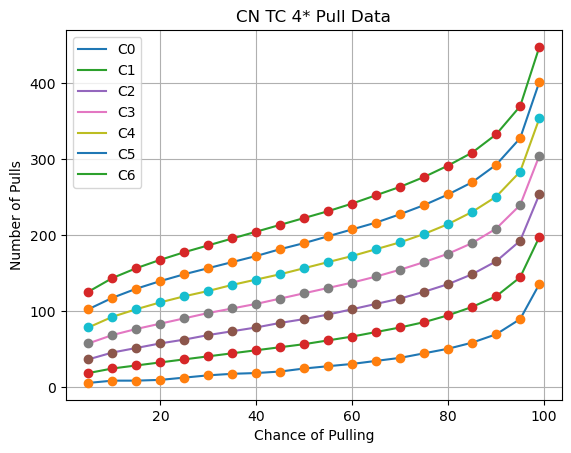

In [4]:
# Generate x values for the curve
x_values = np.linspace(0, 100, 1000)

# Plot the fitted polynomial curves for each constellation
for i, coeffs in enumerate(coefficients_by_constellation):
    fitted_curve = polynomial_function(x_values, *coeffs)
    plt.plot(percentage_chance, n_C0_to_C6[:, i], label=f'C{i}')
    plt.plot(percentage_chance, n_C0_to_C6[:, i], 'o')

# Set plot labels and legend
plt.xlabel('Chance of Pulling')
plt.ylabel('Number of Pulls')
plt.title('CN TC 4* Pull Data')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [5]:
# Extrapolate the fitted polynomial curves for each constellation to 100% chance
extrapolated_values = [polynomial_function(100, *coeffs) for coeffs in coefficients_by_constellation]

# Print the extrapolated values
for i, value in enumerate(extrapolated_values):
    print(f'Extrapolated value for C{i} at 100% chance: {value}')

Extrapolated value for C0 at 100% chance: 155.44322216743603
Extrapolated value for C1 at 100% chance: 222.8136745694792
Extrapolated value for C2 at 100% chance: 289.256473869551
Extrapolated value for C3 at 100% chance: 335.2279695577163
Extrapolated value for C4 at 100% chance: 388.762073344551
Extrapolated value for C5 at 100% chance: 444.4985983663937
Extrapolated value for C6 at 100% chance: 488.8061055888538


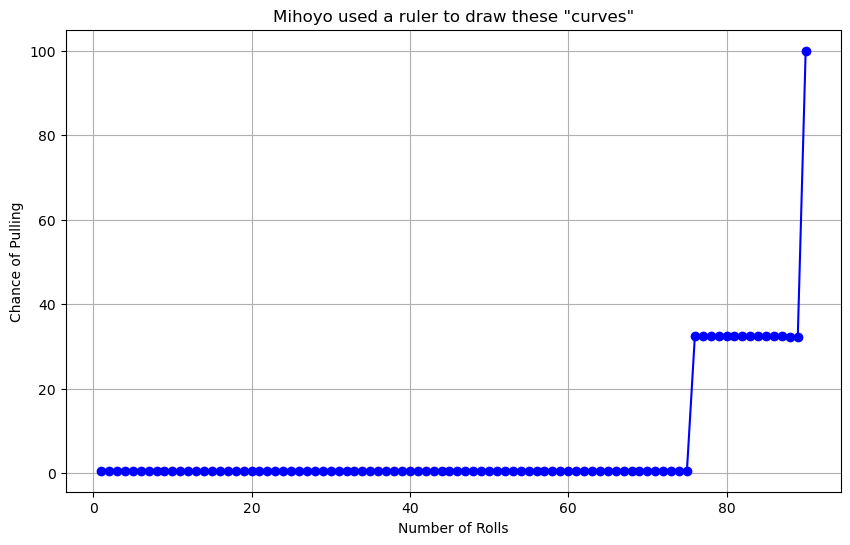

In [6]:
# Data
chance = [
    0.603622, 0.599598, 0.599166, 0.601759, 0.600281, 0.599784, 0.600292, 0.599745,
    0.599167, 0.599612, 0.600042, 0.599391, 0.599781, 0.599074, 0.600509, 0.600854,
    0.600081, 0.599273, 0.600657, 0.600924, 0.598917, 0.599122, 0.599308, 0.600625,
    0.599633, 0.600925, 0.599881, 0.601148, 0.60005, 0.598909, 0.600122, 0.60013,
    0.600116, 0.598861, 0.600015, 0.599933, 0.599829, 0.5997, 0.599548, 0.600635,
    0.599176, 0.600228, 0.601277, 0.601028, 0.600753, 0.59914, 0.601432, 0.601091,
    0.598051, 0.600306, 0.601229, 0.600788, 0.600317, 0.601191, 0.600675, 0.598736,
    0.599541, 0.600338, 0.599711, 0.59905, 0.599791, 0.600523, 0.599794, 0.59903,
    0.5997, 0.600361, 0.601012, 0.600156, 0.600768, 0.599855, 0.598903, 0.600978,
    0.598442, 0.600493, 0.599438, 32.393681, 32.395642, 32.398722, 32.403172, 32.378374,
    32.40298, 32.406646, 32.416646, 32.445085, 32.409382, 32.413249, 32.43874, 32.297064,
    32.142857, 100
]

rolls = list(range(1, len(chance) + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(rolls, chance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Rolls')
plt.ylabel('Chance of Pulling')
plt.title('Mihoyo used a ruler to draw these "curves"')
plt.grid(True)

# Show the plot
plt.show()

In [7]:
soft_pity_chances = [32.393681, 32.395642, 32.398722, 32.403172, 32.378374,
    32.40298, 32.406646, 32.416646, 32.445085, 32.409382, 32.413249, 32.43874, 32.297064,
    32.142857]

soft_pity = sum(soft_pity_chances)/len(soft_pity_chances)
soft_pity

32.381588571428566

# Roll Simulation

## Characters and Weapons

In [7]:
standard_four_star_characters = ['Kirara','Yaoyao','Faruzan','Mika','Layla','Kaveh','Candace','Dori','Collei',
                                 'Yunjin','Kuki Shinobu','Heizou','Lynette','Thoma','Gorou','Sara','Yanfei',
                                 'Xingqiu','Beidou','Chongyun','Diona','Fischl','Ningguang','Razor','Sucrose',
                                 'Xiangling','Bennett','Barbara','Kaeya','Rosaria','Diona','Chongyun','Xinyan',
                                 'Fischl','Ningguang','Noelle','Razor','Sucrose','Xingqiu','Beidou','Xiangling',
                                 'Bennett','Amber','Lisa']

featured_four_star = ['Freminet', 'Sayu', 'Noelle']

three_star_weapons = ["Harbinger of Dawn","Skyrider Sword","Fillet Blade","Traveler's Handy Sword",
                      "Debate Club","Bloodtainted Greatsword","Ferrous Shadow","Quartz","White Tassel",
                      "Black Tassel","Halberd","White Iron Polearm","Messenger","Raven Bow","Recurve Bow",
                      "Sharpshooter's Oath"]

standard_four_star_weapons = ["The Flute","Sacrificial Sword","Rainslasher","Eye of Perception","The Widsith",
                              "Favonius Codex","Favonius Sword","Lion's Roar",'Sacrificial Fragments',
                              "Favonius Greatsword","Favonius Lance","Rust","Sacrificial Bow","Dragon's Bane"]

standard_five_star = ['Diluc', 'Jean', 'Tighnari', 'Mona', 'Qiqi', 'Keqing', 'Dehya']

## Roll Simulator

In [8]:
def genshin_roll(total_pulls):
    pulls = []
    rolls = 0
    rolls_since_last_five_star = 0
    rolls_since_last_featured_five_star = 0
    rolls_since_last_four_star = 0
    rolls_since_last_featured_four_star = 0
    while rolls < total_pulls:
        rolls += 1
        outcome = random.random()
        if rolls_since_last_featured_four_star == 20:
            four_star_pull = random.choice(featured_four_star)
            pulls.append(four_star_pull)
            rolls_since_last_featured_four_star = 0
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
        if rolls_since_last_four_star == 10:
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            pulls.append(random.choice(four_star_pull))
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
        elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
            if outcome < soft_pity/100:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                rolls_since_last_five_star = 0
                rolls_since_last_four_star += 1
                if fivestar == 'Zhongli':
                    rolls_since_last_featured_five_star = 0
        elif rolls_since_last_five_star == 90:
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
        elif outcome < 0.006:
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                if fivestar == 'Zhongli':
                    rolls_since_last_five_star = 0
                    rolls_since_last_featured_five_star = 0
                    rolls_since_last_four_star += 1
                else:
                    rolls_since_last_featured_five_star += 1
                    rolls_since_last_five_star = 0
                    rolls_since_last_four_star += 1
        elif outcome < 0.006+0.051:  # 5.1% chance for 4*
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            pulls.append(random.choice(four_star_pull))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star = 0
        else:
    #        pulls.append(random.choice(three_star_weapons))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star += 1
            rolls_since_last_featured_five_star += 1
    return pulls

In [101]:
genshin_roll(180)

['Freminet',
 'Freminet',
 'Noelle',
 'Razor',
 'Favonius Greatsword',
 'Noelle',
 'Favonius Codex',
 'Lisa',
 'Noelle',
 'Zhongli',
 'Noelle',
 'Noelle',
 'Sacrificial Fragments',
 'Favonius Codex',
 'Razor',
 'Favonius Greatsword',
 'Zhongli',
 'Noelle',
 'Sacrificial Fragments',
 'Sayu',
 'Freminet',
 'Favonius Lance',
 'Xingqiu']

## Counting rolls needed per constellation

In [10]:
pulls = []

rolls = 0
rolls_since_last_five_star = 0
rolls_since_last_featured_five_star = 0
rolls_since_last_four_star = 0
rolls_since_last_featured_four_star = 0
total_pulls = 30000

character_counts = {char: {"rolls_to_get": {i: [] for i in range(1, 8)}} for char in standard_four_star_characters}

while rolls < total_pulls:
    rolls += 1
    outcome = random.random()
    if rolls_since_last_featured_four_star == 20:
        char = random.choice(featured_four_star)
        pulls.append(char)
        rolls_since_last_featured_four_star = 0
        rolls_since_last_four_star = 0
        rolls_since_last_five_star += 1
        rolls_since_last_featured_five_star += 1
        if char in character_counts and pulls.count(char) <= 7:
            character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
    if rolls_since_last_four_star == 10:
        standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
        four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
        char = random.choice(four_star_pull)
        pulls.append(char)
        rolls_since_last_four_star = 0
        rolls_since_last_five_star += 1
        rolls_since_last_featured_five_star += 1
        if char in character_counts and pulls.count(char) <= 7:
            character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
    elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
        if outcome < soft_pity/100:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
            rolls_since_last_five_star = 0
            rolls_since_last_four_star += 1
            if fivestar == 'Zhongli':
                rolls_since_last_featured_five_star = 0
    elif rolls_since_last_five_star == 90:
        if rolls_since_last_featured_five_star == 189:
            pulls.append('Zhongli')
            rolls_since_last_five_star = 0
            rolls_since_last_featured_five_star = 0
            rolls_since_last_four_star += 1
        else:
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
    elif outcome < 0.006:
        if rolls_since_last_featured_five_star == 189:
            pulls.append('Zhongli')
            rolls_since_last_five_star = 0
            rolls_since_last_featured_five_star = 0
            rolls_since_last_four_star += 1
        else:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
            if fivestar == 'Zhongli':
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                rolls_since_last_featured_five_star += 1
                rolls_since_last_five_star = 0
                rolls_since_last_four_star += 1
    elif outcome < 0.006+0.051:  # 5.1% chance for 4*
        standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
        four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
        char = random.choice(four_star_pull)
        pulls.append(char)
        if char in character_counts and pulls.count(char) <= 7:
            character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        rolls_since_last_featured_five_star += 1
        rolls_since_last_five_star += 1
        rolls_since_last_four_star = 0
    else:
#        pulls.append(random.choice(three_star_weapons))
        rolls_since_last_five_star += 1
        rolls_since_last_four_star += 1
        rolls_since_last_featured_five_star += 1

for char, counts in character_counts.items():
    print(f"{char}:")
    for copies, rolls_list in counts["rolls_to_get"].items():
        print(f"C{copies-1} - {rolls_list}")

Kirara:
C0 - [300]
C1 - [1711]
C2 - [6287]
C3 - [8314]
C4 - [8741]
C5 - [9361]
C6 - [10199]
Yaoyao:
C0 - [6134]
C1 - [8081]
C2 - [8292]
C3 - [8960]
C4 - [10635]
C5 - [11339]
C6 - [11502]
Faruzan:
C0 - [926]
C1 - [1909]
C2 - [2555]
C3 - [3705]
C4 - [4627]
C5 - [5492]
C6 - [6033]
Mika:
C0 - [267]
C1 - [964]
C2 - [1201]
C3 - [2391]
C4 - [6953]
C5 - [8667]
C6 - [11372]
Layla:
C0 - [68]
C1 - [210]
C2 - [775]
C3 - [3310]
C4 - [5569]
C5 - [5573]
C6 - [5992]
Kaveh:
C0 - [57]
C1 - [1616]
C2 - [1773]
C3 - [4955]
C4 - [5815]
C5 - [8303]
C6 - [9632]
Candace:
C0 - [5935]
C1 - [6584]
C2 - [7387]
C3 - [9420]
C4 - [9931]
C5 - [12163]
C6 - [13656]
Dori:
C0 - [771]
C1 - [1086]
C2 - [1549]
C3 - [5245]
C4 - [6224]
C5 - [7002]
C6 - [7715]
Collei:
C0 - [1250]
C1 - [1316]
C2 - [3555]
C3 - [7008]
C4 - [10336]
C5 - [13704]
C6 - [14817]
Yunjin:
C0 - [1571]
C1 - [2787]
C2 - [4459]
C3 - [9197]
C4 - [9798]
C5 - [11217]
C6 - [11536]
Kuki Shinobu:
C0 - [1064]
C1 - [5002]
C2 - [8729]
C3 - [9487]
C4 - [12744]
C5 - [14

# Average pulls to get each constellation for a 4* character

## Assuming one account

In [214]:
pulls = []

rolls = 0
rolls_since_last_five_star = 0
rolls_since_last_featured_five_star = 0
rolls_since_last_four_star = 0
rolls_since_last_featured_four_star = 0
total_pulls = 30000

standard_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in standard_four_star_characters}
featured_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in featured_four_star}

while rolls < total_pulls:
    rolls += 1
    outcome = random.random()
    if rolls_since_last_featured_four_star == 20:
        char = random.choice(featured_four_star)
        pulls.append(char)
        rolls_since_last_featured_four_star = 0
        rolls_since_last_four_star = 0
        rolls_since_last_five_star += 1
        rolls_since_last_featured_five_star += 1
        if char in character_counts and pulls.count(char) <= 7:
            character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
    if rolls_since_last_four_star == 10:
        standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
        four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
        char = random.choice(four_star_pull)
        pulls.append(char)
        rolls_since_last_four_star = 0
        rolls_since_last_five_star += 1
        rolls_since_last_featured_five_star += 1
        if char in standard_four_star_characters and pulls.count(char) < 8:
            standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif char in featured_four_star and pulls.count(char) < 8:
            featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
    elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
        if outcome < soft_pity/100:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
            rolls_since_last_five_star = 0
            rolls_since_last_four_star += 1
            if fivestar == 'Zhongli':
                rolls_since_last_featured_five_star = 0
    elif rolls_since_last_five_star == 90:
        if rolls_since_last_featured_five_star == 189:
            pulls.append('Zhongli')
            rolls_since_last_five_star = 0
            rolls_since_last_featured_five_star = 0
            rolls_since_last_four_star += 1
        else:
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
    elif outcome < 0.006:
        if rolls_since_last_featured_five_star == 189:
            pulls.append('Zhongli')
            rolls_since_last_five_star = 0
            rolls_since_last_featured_five_star = 0
            rolls_since_last_four_star += 1
        else:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            pulls.append(fivestar)
            if fivestar == 'Zhongli':
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                rolls_since_last_featured_five_star += 1
                rolls_since_last_five_star = 0
                rolls_since_last_four_star += 1
    elif outcome < 0.006+0.051:  # 5.1% chance for 4*
        standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
        char = random.choice(four_star_pull)
        pulls.append(char)
        if char in standard_four_star_characters and pulls.count(char) < 8:
            standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif char in featured_four_star and pulls.count(char) < 8:
            featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        rolls_since_last_featured_five_star += 1
        rolls_since_last_five_star += 1
        rolls_since_last_four_star = 0
    else:
#        pulls.append(random.choice(three_star_weapons))
        rolls_since_last_five_star += 1
        rolls_since_last_four_star += 1
        rolls_since_last_featured_five_star += 1

average_rolls_standard = {copies: statistics.mean(rolls_list) for char, counts in standard_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}

average_rolls_featured = {copies: statistics.mean(rolls_list) for char, counts in featured_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}

standard_four_star_odds = []
featured_four_star_odds = []

#print("Average Rolls for Standard 4-Star Characters:")
for copies, avg_rolls in average_rolls_standard.items():
#    print(f"C{copies-1} Average Rolls: {avg_rolls}")
    standard_four_star_odds.append(avg_rolls)

#print("\nAverage Rolls for Featured 4-Star Characters:")
for copies, avg_rolls in average_rolls_featured.items():
#    print(f"C{copies-1} Average Rolls: {avg_rolls}")
    featured_four_star_odds.append(avg_rolls)

## Simulation with multiple accounts

In [12]:
def simulate_four_star_gacha(total_pulls):
    pulls = []
    rolls = 0
    rolls_since_last_five_star = 0
    rolls_since_last_featured_five_star = 0
    rolls_since_last_four_star = 0
    rolls_since_last_featured_four_star = 0
    standard_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in standard_four_star_characters}
    featured_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in featured_four_star}
    while rolls < total_pulls:
        rolls += 1
        outcome = random.random()
        if rolls_since_last_featured_four_star == 20:
            char = random.choice(featured_four_star)
            pulls.append(char)
            rolls_since_last_featured_four_star = 0
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
            if char in character_counts and pulls.count(char) < 8:
                character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif rolls_since_last_four_star == 10:
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
            if char in standard_four_star_characters and pulls.count(char) < 8:
                standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            elif char in featured_four_star and pulls.count(char) < 8:
                featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
            if outcome < soft_pity/100:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                rolls_since_last_five_star = 0
                rolls_since_last_four_star += 1
                if fivestar == 'Zhongli':
                    rolls_since_last_featured_five_star = 0
        elif rolls_since_last_five_star == 90:
            if rolls_since_last_featured_five_star == 189:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
        elif outcome < 0.006:
            if rolls_since_last_featured_five_star == 189:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
            else:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                if fivestar == 'Zhongli':
                    rolls_since_last_five_star = 0
                    rolls_since_last_featured_five_star = 0
                    rolls_since_last_four_star += 1
                else:
                    rolls_since_last_featured_five_star += 1
                    rolls_since_last_five_star = 0
                    rolls_since_last_four_star += 1
        elif outcome < 0.006+0.051:  # 5.1% chance for 4*
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
            if char in standard_four_star_characters and pulls.count(char) < 8:
                standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            elif char in featured_four_star and pulls.count(char) < 8:
                featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            rolls_since_last_featured_five_star += 1
            rolls_since_last_five_star += 1
            rolls_since_last_four_star = 0
        else:
    #        pulls.append(random.choice(three_star_weapons))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star += 1
            rolls_since_last_featured_five_star += 1
    average_rolls_standard = {copies: statistics.mean(rolls_list) for char, counts in standard_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}
    average_rolls_featured = {copies: statistics.mean(rolls_list) for char, counts in featured_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}
    standard_four_star_odds = []
    featured_four_star_odds = []
    for copies, avg_rolls in average_rolls_standard.items():
        standard_four_star_odds.append(avg_rolls)
    for copies, avg_rolls in average_rolls_featured.items():
        featured_four_star_odds.append(avg_rolls)
    return standard_four_star_odds, featured_four_star_odds

In [13]:
simulate_four_star_gacha(30000)

([1211, 1395, 6765, 7773, 7879, 13820, 14831],
 [11, 78, 138, 311, 335, 384, 418])

### Optimal Sample Size Calculation

In [14]:
confidence_level = 0.95
margin_of_error = 0.1

estimated_std_dev = 5

z_score = 1.96

required_sample_size = ((z_score**2) * (estimated_std_dev**2)) / (margin_of_error**2)

required_sample_size = math.ceil(required_sample_size)

print(f"Required Sample Size: {required_sample_size}")

Required Sample Size: 9604


In [60]:
users = 385
user = 0

average_rolls_standard_all = []
average_rolls_featured_all = []

while user < users:
    user += 1
    standard_four_star_odds, featured_four_star_odds = simulate_four_star_gacha(30000)
    average_rolls_standard_all.append(standard_four_star_odds)
    average_rolls_featured_all.append(featured_four_star_odds)

overall_average_standard = [statistics.mean(rolls) for rolls in zip(*average_rolls_standard_all)]
overall_average_featured = [statistics.mean(rolls) for rolls in zip(*average_rolls_featured_all)]

print("\nOverall Average Rolls for Standard 4-Star Characters:")
print(overall_average_standard)

print("\nOverall Average Rolls for Featured 4-Star Characters:")
print(overall_average_featured)


Overall Average Rolls for Standard 4-Star Characters:
[1429.5844155844156, 2956.836363636364, 4473.558441558442, 6034.197402597402, 7433.353246753247, 9030.755844155845, 10581.906493506494]

Overall Average Rolls for Featured 4-Star Characters:
[53.95844155844156, 108.41818181818182, 158.17402597402597, 214.73766233766233, 261.8363636363636, 313.37922077922076, 366.4909090909091]


In [61]:
print("Overall Average Rolls for Standard 4-Star Characters:")
standard_output = ", ".join([f"C{i}: {avg:.2f}" for i, avg in enumerate(overall_average_standard)])
print(standard_output)

print("\nOverall Average Rolls for Featured 4-Star Characters:")
featured_output = ", ".join([f"C{i}: {avg:.2f}" for i, avg in enumerate(overall_average_featured)])
print(featured_output)

Overall Average Rolls for Standard 4-Star Characters:
C0: 1429.58, C1: 2956.84, C2: 4473.56, C3: 6034.20, C4: 7433.35, C5: 9030.76, C6: 10581.91

Overall Average Rolls for Featured 4-Star Characters:
C0: 53.96, C1: 108.42, C2: 158.17, C3: 214.74, C4: 261.84, C5: 313.38, C6: 366.49


In [62]:
def calculate_average_gap(numbers):
    gaps = [numbers[i] - numbers[i - 1] for i in range(1, len(numbers))]
    return sum(gaps) / len(gaps)

average_gap_standard_four_star = calculate_average_gap(overall_average_standard)
average_gap_featured_four_star = calculate_average_gap(overall_average_featured)

print("Average pulls per constellation for standard 4* characters:", round(average_gap_standard_four_star, 2))
print("Average pulls per constellation for featured 4* characters:", round(average_gap_featured_four_star, 2))

Average pulls per constellation for standard 4* characters: 1525.39
Average pulls per constellation for featured 4* characters: 52.09


# Average pulls to get each constellation for a 5* character

In [382]:
featured_five_star = ['Zhongli']
five_star_characters = ['Diluc', 'Jean', 'Tighnari', 'Mona', 'Qiqi', 'Keqing', 'Dehya', 'Zhongli']

def simulate_five_star_gacha(total_pulls):
    five_star_character_counts = {char: {"rolls_to_get": {i: [] for i in range(1, 8)}} for char in five_star_characters}
    pulls = []
    rolls = 0
    rolls_since_last_five_star = 0
    rolls_since_last_featured_five_star = 0
    rolls_since_last_four_star = 0
    rolls_since_last_featured_four_star = 0
    standard_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in standard_five_star}
    featured_character_counts = {char: {"rolls_to_get": {i: [] for i in range(8)}} for char in featured_five_star}
    while rolls < total_pulls:
        rolls += 1
        outcome = random.random()
        if rolls_since_last_featured_four_star == 20:
            char = random.choice(featured_four_star)
            pulls.append(char)
            rolls_since_last_featured_four_star = 0
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
        elif rolls_since_last_four_star == 10:
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
        elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
            if outcome < soft_pity/100:
                if rolls_since_last_featured_five_star > rolls_since_last_five_star:
                    fivestar = 'Zhongli'
                    char = fivestar
                    pulls.append(fivestar)
                elif rolls_since_last_featured_five_star < rolls_since_last_five_star:
                    five_star = ['Zhongli', random.choice(standard_five_star)]
                    fivestar = random.choice(five_star)
                    char = fivestar
                    pulls.append(fivestar)
                rolls_since_last_five_star = 0
                rolls_since_last_four_star += 1
                if char == 'Zhongli':
                    rolls_since_last_featured_five_star = 0
                if char in standard_five_star and pulls.count(char) < 8:
                    standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
                if char in featured_five_star and pulls.count(char) < 8:
                    featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            elif outcome < ((soft_pity/100)+0.051):
                standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
                four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
                char = random.choice(four_star_pull)
                pulls.append(char)
                if char in standard_four_star_characters:
                    rolls_since_last_featured_four_star += 1
                elif char in featured_four_star:
                    rolls_since_last_featured_four_star = 0
                rolls_since_last_featured_five_star += 1
                rolls_since_last_five_star += 1
                rolls_since_last_four_star = 0
        elif rolls_since_last_five_star == 90:
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            else:
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                char = fivestar
            if char in standard_five_star and pulls.count(char) < 8:
                standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            if char in featured_five_star and pulls.count(char) < 8:
                featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif outcome < 0.006:
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            else:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                char = fivestar
                pulls.append(fivestar)
                if char == 'Zhongli':
                    rolls_since_last_five_star = 0
                    rolls_since_last_featured_five_star = 0
                    rolls_since_last_four_star += 1
                else:
                    rolls_since_last_featured_five_star += 1
                    rolls_since_last_five_star = 0
                    rolls_since_last_four_star += 1
            if char in standard_five_star and pulls.count(char) < 8:
                standard_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
            if char in featured_five_star and pulls.count(char) < 8:
                featured_character_counts[char]["rolls_to_get"][pulls.count(char)].append(rolls)
        elif outcome < 0.006+0.051:  # 5.1% chance for 4*
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
            rolls_since_last_featured_five_star += 1
            rolls_since_last_five_star += 1
            rolls_since_last_four_star = 0
        else:
    #        pulls.append(random.choice(three_star_weapons))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star += 1
            rolls_since_last_featured_five_star += 1
    average_rolls_standard = {copies: statistics.mean(rolls_list) for char, counts in standard_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}
    average_rolls_featured = {copies: statistics.mean(rolls_list) for char, counts in featured_character_counts.items() for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list}
    standard_five_star_odds = []
    featured_five_star_odds = []
    for copies, avg_rolls in average_rolls_standard.items():
        standard_five_star_odds.append(avg_rolls)
    for copies, avg_rolls in average_rolls_featured.items():
        featured_five_star_odds.append(avg_rolls)
    return standard_five_star_odds, featured_five_star_odds
#    return featured_character_counts

In [393]:
simulate_five_star_gacha(30000)

([9264, 9388, 9742, 19493, 22365, 24445, 28080],
 [220, 377, 495, 565, 749, 811, 965])

In [174]:
users = 385
user = 0

average_rolls_standard_all = []
average_rolls_featured_all = []

while user < users:
    user += 1
    standard_four_star_odds, featured_four_star_odds = simulate_five_star_gacha(30000)
    average_rolls_standard_all.append(standard_four_star_odds)
    average_rolls_featured_all.append(featured_four_star_odds)

overall_average_standard = [statistics.mean(rolls) for rolls in zip(*average_rolls_standard_all)]
overall_average_featured = [statistics.mean(rolls) for rolls in zip(*average_rolls_featured_all)]

print("\nOverall Average Rolls for Standard 5-Star Characters:")
print(overall_average_standard)

print("\nOverall Average Rolls for Featured 5-Star Characters:")
print(overall_average_featured)


Overall Average Rolls for Standard 5-Star Characters:
[2691.851948051948, 5441.231168831169, 8274.194805194806, 10811.675324675325, 13408.485714285714, 15817.111688311688, 17871.51168831169]

Overall Average Rolls for Featured 5-Star Characters:
[128.27012987012986, 254.09350649350648, 376.1454545454545, 498.8545454545455, 625.4129870129871, 758.6181818181818, 889.9922077922078]


In [175]:
print("Overall Average Rolls for Standard 5-Star Characters:")
standard_output = ", ".join([f"C{i}: {avg:.2f}" for i, avg in enumerate(overall_average_standard)])
print(standard_output)

print("\nOverall Average Rolls for Featured 5-Star Characters:")
featured_output = ", ".join([f"C{i}: {avg:.2f}" for i, avg in enumerate(overall_average_featured)])
print(featured_output)

Overall Average Rolls for Standard 5-Star Characters:
C0: 2691.85, C1: 5441.23, C2: 8274.19, C3: 10811.68, C4: 13408.49, C5: 15817.11, C6: 17871.51

Overall Average Rolls for Featured 5-Star Characters:
C0: 128.27, C1: 254.09, C2: 376.15, C3: 498.85, C4: 625.41, C5: 758.62, C6: 889.99


In [176]:
average_gap_standard_five_star = calculate_average_gap(overall_average_standard)
average_gap_featured_five_star = calculate_average_gap(overall_average_featured)

print("Average pulls per constellation for standard 5* characters:", round(average_gap_standard_five_star, 2))
print("Average pulls per constellation for featured 5* characters:", round(average_gap_featured_five_star, 2))

Average pulls per constellation for standard 5* characters: 2529.94
Average pulls per constellation for featured 5* characters: 126.95


# 5* Unit Pity Analysis

In [378]:
def simulate_test_five_star_gacha(total_pulls):
    five_star_character_counts = []
    pulls = []
    rolls = 0
    rolls_since_last_five_star = 0
    rolls_since_last_featured_five_star = 0
    rolls_since_last_four_star = 0
    rolls_since_last_featured_four_star = 0
    fifty_fifty_wins = 0
    fifty_fifty_losses = 0
    while rolls < total_pulls:
        rolls += 1
        outcome = random.random()
        if rolls_since_last_five_star == 90:
            if rolls_since_last_featured_five_star < rolls_since_last_five_star:
                pulls.append('Zhongli')
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            else:
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                char = fivestar
            if char in featured_five_star and pulls.count(char) < 8:
                five_star_character_counts.append(rolls_since_last_five_star)
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
        elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90:
            if outcome < soft_pity/100:
                if rolls_since_last_featured_five_star > 1 and rolls_since_last_five_star > rolls_since_last_featured_five_star:
                    rolls_since_last_featured_four_star = 0
                    rolls_since_last_four_star = 0                
                    five_star = ['Zhongli', random.choice(standard_five_star)]
                    fivestar = random.choice(five_star)
                    char = fivestar
                    pulls.append(fivestar)
                    if fivestar == 'Zhongli':
                        rolls_since_last_featured_five_star = 0
                    else:
                        rolls_since_last_five_star = 0
                        rolls_since_last_featured_five_star += 1
                elif rolls_since_last_five_star > 1 and rolls_since_last_featured_five_star > rolls_since_last_five_star:
                    rolls_since_last_featured_four_star = 0
                    rolls_since_last_four_star = 0                
                    fivestar = 'Zhongli'
                    char = fivestar
                    pulls.append(fivestar)
                    if fivestar == 'Zhongli':
                        rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
                if char in standard_five_star:
                    five_star_character_counts.append(rolls_since_last_five_star)
                if char in featured_five_star:
                    five_star_character_counts.append(rolls_since_last_five_star)
                rolls_since_last_five_star = 0
            if outcome < ((soft_pity/100)+0.051):
                standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
                four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
                char = random.choice(four_star_pull)
                pulls.append(char)
                if char in standard_four_star_characters:
                    rolls_since_last_featured_four_star += 1
                elif char in featured_four_star:
                    rolls_since_last_featured_four_star = 0
                rolls_since_last_featured_five_star += 1
                rolls_since_last_five_star += 1
                rolls_since_last_four_star = 0
        elif outcome < 0.006:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            char = fivestar
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            elif char in featured_five_star and pulls.count(char) < 8:
                five_star_character_counts.append(rolls_since_last_five_star)
            else:
                pulls.append(fivestar)
                if fivestar == 'Zhongli':
                    rolls_since_last_five_star = 0
                    rolls_since_last_featured_five_star = 0
                    rolls_since_last_four_star += 1
                else:
                    rolls_since_last_featured_five_star += 1
                    rolls_since_last_five_star = 0
                    rolls_since_last_four_star += 1
        elif rolls_since_last_featured_four_star == 20:
            char = random.choice(featured_four_star)
            pulls.append(char)
            rolls_since_last_featured_four_star = 0
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
        elif rolls_since_last_four_star == 10:
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
        elif outcome < 0.006+0.051:  # 5.1% chance for 4*
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
            rolls_since_last_featured_five_star += 1
            rolls_since_last_five_star += 1
            rolls_since_last_four_star = 0
        else:
    #        pulls.append(random.choice(three_star_weapons))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star += 1
            rolls_since_last_featured_five_star += 1
#    average_rolls_five_stars = {char: {copies: statistics.mean(rolls_list) for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list} for char, counts in five_star_character_counts.items()}
#    five_star_odds = [average_rolls_five_stars[char] for char in all_five_star]
    return statistics.mean(five_star_character_counts)

In [379]:
simulate_test_five_star_gacha(30000)

74.49342105263158

In [376]:
users = 385
user = 0

average_rolls_five_star_all = []

while user < users:
    user += 1
    all_five_star_odds = simulate_test_five_star_gacha(30000)
    average_rolls_five_star_all.append(all_five_star_odds)

print("\nOverall average rolls per 5* character:")
print(statistics.mean(average_rolls_five_star_all))
#average_rolls_five_star_all


Overall average rolls per 5* character:
74.30870841573942


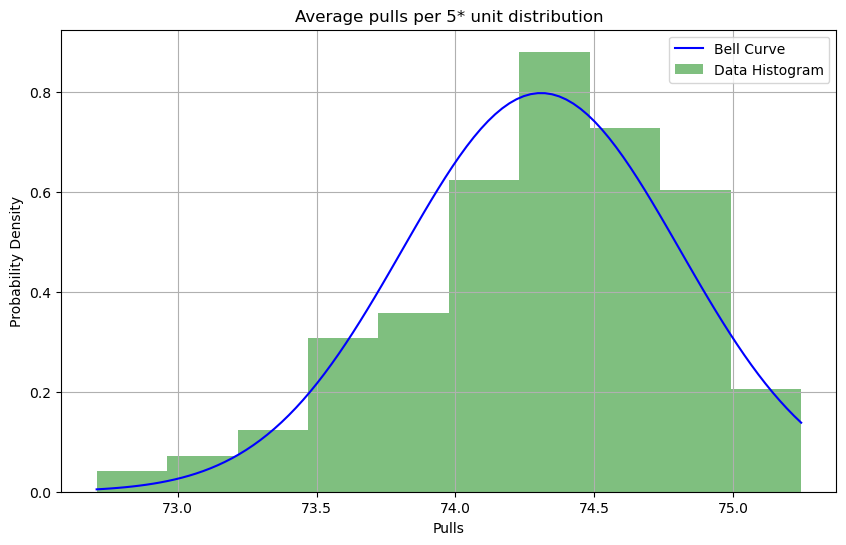

In [377]:
mean = np.mean(average_rolls_five_star_all)
std_dev = np.std(average_rolls_five_star_all)

x = np.linspace(min(average_rolls_five_star_all), max(average_rolls_five_star_all), 100)

pdf = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Bell Curve', color='blue')
plt.hist(average_rolls_five_star_all, bins=10, density=True, alpha=0.5, color='green', label='Data Histogram')
plt.title('Average pulls per 5* unit distribution')
plt.xlabel('Pulls')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

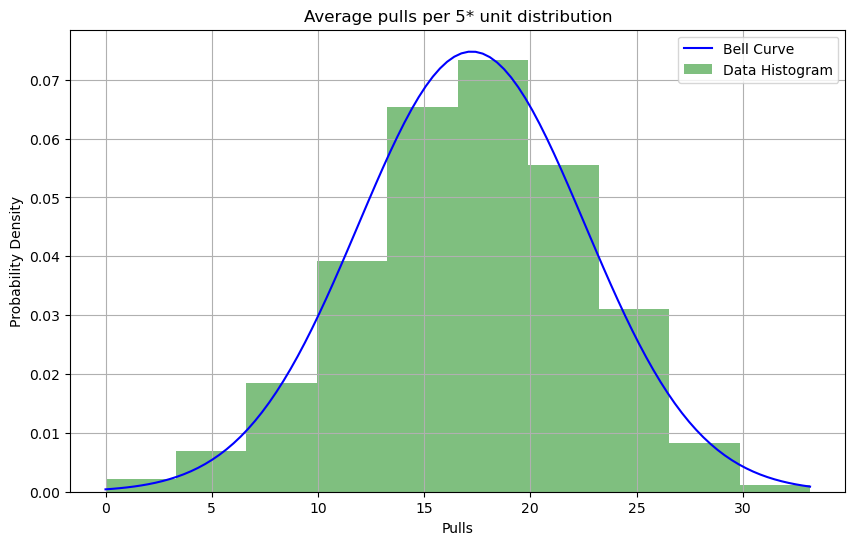

In [180]:
mean = np.mean(average_rolls_five_star_all)
std_dev = np.std(average_rolls_five_star_all)

x = np.linspace(min(average_rolls_five_star_all), max(average_rolls_five_star_all), 100)

pdf = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Bell Curve', color='blue')
plt.hist(average_rolls_five_star_all, bins=10, density=True, alpha=0.5, color='green', label='Data Histogram')
plt.title('Average pulls per 5* unit distribution')
plt.xlabel('Pulls')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

## Pulls every featured 5* unit

In [189]:
def simulate_featured_five_star_gacha(total_pulls):
    featured_five_star_character_counts = []
    pulls = []
    rolls = 0
    rolls_since_last_five_star = 0
    rolls_since_last_featured_five_star = 0
    rolls_since_last_four_star = 0
    rolls_since_last_featured_four_star = 0
    fifty_fifth_wins = 0
    fifty_fifth_losses = 0
    while rolls < total_pulls:
        rolls += 1
        outcome = random.random()
        if rolls_since_last_featured_four_star == 20:
            char = random.choice(featured_four_star)
            pulls.append(char)
            rolls_since_last_featured_four_star = 0
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
        elif rolls_since_last_four_star == 10:
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            rolls_since_last_four_star = 0
            rolls_since_last_five_star += 1
            rolls_since_last_featured_five_star += 1
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
        elif rolls_since_last_five_star > 74 and rolls_since_last_five_star < 90 and rolls_since_last_featured_five_star > rolls_since_last_five_star:
            if outcome < soft_pity/100:
                five_star = ['Zhongli', random.choice(standard_five_star)]
                fivestar = random.choice(five_star)
                char = fivestar
                pulls.append(fivestar)
                rolls_since_last_four_star += 1
                if char in featured_five_star and pulls.count(char) < 8:
                    featured_five_star_character_counts.append(rolls_since_last_featured_five_star)
                if fivestar == 'Zhongli':
                    rolls_since_last_featured_five_star = 0
                rolls_since_last_five_star = 0
        elif rolls_since_last_five_star == 90:
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            else:
                fivestar = random.choice(five_star)
                pulls.append(fivestar)
                char = fivestar
            if char in featured_five_star and pulls.count(char) < 8:
                featured_five_star_character_counts.append(rolls_since_last_featured_five_star)
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
        elif outcome < 0.006:
            five_star = ['Zhongli', random.choice(standard_five_star)]
            fivestar = random.choice(five_star)
            char = fivestar
            if rolls_since_last_featured_five_star == 180:
                pulls.append('Zhongli')
                rolls_since_last_five_star = 0
                rolls_since_last_featured_five_star = 0
                rolls_since_last_four_star += 1
                char = 'Zhongli'
            elif char in featured_five_star and pulls.count(char) < 8:
                featured_five_star_character_counts.append(rolls_since_last_featured_five_star)
            else:
                pulls.append(fivestar)
                if fivestar == 'Zhongli':
                    rolls_since_last_five_star = 0
                    rolls_since_last_featured_five_star = 0
                    rolls_since_last_four_star += 1
                else:
                    rolls_since_last_featured_five_star += 1
                    rolls_since_last_five_star = 0
                    rolls_since_last_four_star += 1
        elif outcome < 0.006+0.051:  # 5.1% chance for 4*
            standard_four_star = [random.choice(standard_four_star_characters), random.choice(standard_four_star_weapons)]
            four_star_pull = [random.choice(featured_four_star), random.choice(standard_four_star)]
            char = random.choice(four_star_pull)
            pulls.append(char)
            if char in standard_four_star_characters:
                rolls_since_last_featured_four_star += 1
            elif char in featured_four_star:
                rolls_since_last_featured_four_star = 0
            rolls_since_last_featured_five_star += 1
            rolls_since_last_five_star += 1
            rolls_since_last_four_star = 0
        else:
    #        pulls.append(random.choice(three_star_weapons))
            rolls_since_last_five_star += 1
            rolls_since_last_four_star += 1
            rolls_since_last_featured_five_star += 1
#    average_rolls_five_stars = {char: {copies: statistics.mean(rolls_list) for copies, rolls_list in counts["rolls_to_get"].items() if rolls_list} for char, counts in five_star_character_counts.items()}
#    five_star_odds = [average_rolls_five_stars[char] for char in all_five_star]
    return statistics.mean(featured_five_star_character_counts)

In [190]:
simulate_featured_five_star_gacha(1260)

135.21428571428572

# Calculation of Feature Uptime Multiplier

In [81]:
# Existing character appearances data taken from Reddit
character_appearances = {
    "Venti": 4,
    "Klee": 3,
    "Tartaglia": 4,
    "Zhongli": 4,
    "Albedo": 3,
    "Ganyu": 3,
    "Xiao": 4,
    "Hu Tao": 4,
    "Eula": 2,
    "Kazuha": 2,
    "Ayaka": 3,
    "Yoimiya": 3,
    "Raiden": 3,
    "Kokomi": 3,
    "Arataki Itto": 3,
    "Shenhe": 2,
    "Yae Miko": 2,
    "Ayato": 2,
    "Yelan": 2,
    "Tighnari": 1,
    "Cyno": 2,
    "Nilou": 1,
    "Nahida": 1,
    "Wanderer": 1,
    "Alhaitham": 1,
    "Dehya": 1,
    "Baizhu": 1,
    "Barbara": 8,
    "Fischl": 6,
    "Xiangling": 7,
    "Xingqiu": 8,
    "Noelle": 7,
    "Sucrose": 8,
    "Diona": 8,
    "Beidou": 7,
    "Ningguang": 7,
    "Xinyan": 7,
    "Razor": 5,
    "Chongyun": 6,
    "Bennett": 8,
    "Rosaria": 6,
    "Yanfei": 6,
    "Sayu": 5,
    "Sara": 3,
    "Thoma": 4,
    "Gorou": 3,
    "Yunjin": 4,
    "Shinobu": 2,
    "Heizou": 2,
}

# Dictionary mapping characters to their release months and years
character_release_dates = {
    "Venti": "2020-09",
    "Klee": "2020-10",
    "Tartaglia": "2020-11",
    "Zhongli": "2020-12",
    "Albedo": "2020-12",
    "Ganyu": "2021-01",
    "Xiao": "2021-02",
    "Hu Tao": "2021-03",
    "Eula": "2021-05",
    "Kazuha": "2021-06",
    "Ayaka": "2021-07",
    "Yoimiya": "2021-08",
    "Raiden Shogun": "2021-09",
    "Kokomi": "2021-09",
    "Itto": "2021-12",
    "Shenhe": "2022-01",
    "Yae Miko": "2022-01",
    "Ayato": "2022-01",
    "Yelan": "2022-01",
    "Tighnari": "2022-01",
    "Cyno": "2022-01",
    "Nilou": "2022-01",
    "Nahida": "2022-01",
    "Wanderer": "2022-01",
    "Alhaitham": "2022-01",
    "Dehya": "2022-01",
    "Baizhu": "2022-01",
    "Barbara": "2020-09",
    "Fischl": "2020-09",
    "Xiangling": "2020-09",
    "Xingqiu": "2020-09",
    "Noelle": "2020-09",
    "Sucrose": "2020-09",
    "Diona": "2020-09",
    "Beidou": "2020-09",
    "Ningguang": "2020-09",
    "Xinyan": "2020-09",
    "Razor": "2020-10",
    "Chongyun": "2020-10",
    "Bennett": "2020-11",
    "Rosaria": "2020-11",
    "Yanfei": "2020-11",
    "Sayu": "2020-12",
    "Sara": "2021-02",
    "Thoma": "2021-03",
    "Gorou": "2021-03",
    "Yunjin": "2021-03",
    "Kuki Shinobu": "2021-05",
    "Heizou": "2021-05"
}

# Add release months and years to the character appearances data
character_appearances_with_dates = {}
for character, appearances in character_appearances.items():
    release_date = character_release_dates.get(character, "2021-09")
    character_appearances_with_dates[character] = {
        "Character": character,
        "Appearances": appearances,
        "Release Date": release_date,
    }

# Print the updated data
for character, data in character_appearances_with_dates.items():
    print(data)


{'Character': 'Venti', 'Appearances': 4, 'Release Date': '2020-09'}
{'Character': 'Klee', 'Appearances': 3, 'Release Date': '2020-10'}
{'Character': 'Tartaglia', 'Appearances': 4, 'Release Date': '2020-11'}
{'Character': 'Zhongli', 'Appearances': 4, 'Release Date': '2020-12'}
{'Character': 'Albedo', 'Appearances': 3, 'Release Date': '2020-12'}
{'Character': 'Ganyu', 'Appearances': 3, 'Release Date': '2021-01'}
{'Character': 'Xiao', 'Appearances': 4, 'Release Date': '2021-02'}
{'Character': 'Hu Tao', 'Appearances': 4, 'Release Date': '2021-03'}
{'Character': 'Eula', 'Appearances': 2, 'Release Date': '2021-05'}
{'Character': 'Kazuha', 'Appearances': 2, 'Release Date': '2021-06'}
{'Character': 'Ayaka', 'Appearances': 3, 'Release Date': '2021-07'}
{'Character': 'Yoimiya', 'Appearances': 3, 'Release Date': '2021-08'}
{'Character': 'Raiden', 'Appearances': 3, 'Release Date': '2021-09'}
{'Character': 'Kokomi', 'Appearances': 3, 'Release Date': '2021-09'}
{'Character': 'Arataki Itto', 'Appeara

In [82]:
# Create a DataFrame
df = pd.DataFrame(list(character_appearances.items()), columns=["Character", "Appearances"])

# Add the release date column
df["Release Date"] = df["Character"].map(character_release_dates)

# Display the DataFrame
df

,Character,Appearances,Release Date
0,Venti,4,2020-09
1,Klee,3,2020-10
2,Tartaglia,4,2020-11
3,Zhongli,4,2020-12
4,Albedo,3,2020-12
5,Ganyu,3,2021-01
6,Xiao,4,2021-02
7,Hu Tao,4,2021-03
8,Eula,2,2021-05
9,Kazuha,2,2021-06


In [83]:
# Calculate the average appearances per year for 5* units with >1 average appearance per year
today_date = datetime(2023, 3, 23)  # Assuming the date today is March 2023
df = pd.DataFrame(list(character_appearances.items()), columns=["Character", "Appearances"])
df["Release Date"] = df["Character"].map(character_release_dates)
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Years Since Release"] = (today_date - df["Release Date"]).dt.days / 365
df["Average Appearances Per Year"] = df["Appearances"] / df["Years Since Release"]

# Filter characters with >1 average appearance per year
filtered_df = df[df["Average Appearances Per Year"] > 1]

# Display the filtered DataFrame
filtered_df[["Character", "Average Appearances Per Year"]]

,Character,Average Appearances Per Year
0,Venti,1.564845
1,Klee,1.212625
2,Tartaglia,1.674312
3,Zhongli,1.733967
4,Albedo,1.300475
5,Ganyu,1.350185
6,Xiao,1.871795
7,Hu Tao,1.941489
8,Eula,1.056440
9,Kazuha,1.106061


In [84]:
# Calculate the average appearances per year for 5* units with >1 average appearance per year
today_date = datetime(2023, 3, 1)  # Assuming the date today is March 2023
df = pd.DataFrame(list(character_appearances.items()), columns=["Character", "Appearances"])
df["Release Date"] = df["Character"].map(character_release_dates)
df["Rarity"] = "5*"  # Assume all characters in the provided data are 5* by default
df.loc[df["Character"].isin(standard_four_star_characters), "Rarity"] = "4*"
df.loc[df["Character"].isin(featured_four_star), "Rarity"] = "4*"
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Years Since Release"] = (today_date - df["Release Date"]).dt.days / 365
df["Average Appearances Per Year"] = df["Appearances"] / df["Years Since Release"]

# Filter characters with >1 average appearance per year
filtered_df_5 = df[(df["Average Appearances Per Year"] > 1) & (df["Rarity"] == "5*")]

# Display the filtered DataFrame
filtered_df_5[["Character", "Rarity", "Average Appearances Per Year"]]

,Character,Rarity,Average Appearances Per Year
0,Venti,5*,1.602634
1,Klee,5*,1.242906
2,Tartaglia,5*,1.717647
3,Zhongli,5*,1.780488
4,Albedo,5*,1.335366
5,Ganyu,5*,1.387833
6,Xiao,5*,1.926121
7,Hu Tao,5*,2.000000
8,Eula,5*,1.091181
9,Kazuha,5*,1.144201


In [85]:
featured_fivestar_uptime_multiplier = filtered_df_5["Average Appearances Per Year"].median()
featured_fivestar_uptime_multiplier

1.7216981132075473

In [86]:
filtered_df_4 = df[(df["Release Date"] == '2020-09') & (df["Rarity"] == "4*")]

# Display the filtered DataFrame
filtered_df_4[["Character", "Rarity", "Average Appearances Per Year"]]

,Character,Rarity,Average Appearances Per Year
27,Barbara,4*,3.205269
28,Fischl,4*,2.403952
29,Xiangling,4*,2.804610
30,Xingqiu,4*,3.205269
31,Noelle,4*,2.804610
32,Sucrose,4*,3.205269
33,Diona,4*,3.205269
34,Beidou,4*,2.804610
35,Ningguang,4*,2.804610
36,Xinyan,4*,2.804610


In [87]:
featured_fourstar_uptime_multiplier = filtered_df_4["Average Appearances Per Year"].median()
featured_fourstar_uptime_multiplier

2.804610318331504

In [93]:
featured_uptime_multiplier = featured_fourstar_uptime_multiplier/featured_fivestar_uptime_multiplier
featured_uptime_multiplier

1.628979143798024

In [94]:
print("Average pulls per constellation for featured 4* characters:", round(average_gap_featured_four_star * featured_uptime_multiplier, 2))
print("Average pulls per constellation for featured 5* characters:", round(average_gap_featured_five_star, 2))

Average pulls per constellation for featured 4* characters: 210.12
Average pulls per constellation for featured 5* characters: 128.99


In [95]:
fourstar_pull_average = average_gap_featured_four_star * featured_uptime_multiplier
four_five_ratio = fourstar_pull_average/average_gap_featured_five_star
four_five_ratio

1.628979143798024

In [96]:
constellation_four = 6/four_five_ratio
constellation_four

3.683288409703504

# 5* featured unit - 4* unit constellation wish-equivalence ratio

In [97]:
print(f"C{constellation_four} 4* unit = C0 5* featured unit")
print(f"C6 4* unit = C{6/constellation_four} 5* featured unit")

C3.683288409703504 4* unit = C0 5* featured unit
C6 4* unit = C1.628979143798024 5* featured unit
